Model Summary Table:

Predictions from Polynomial Regression (Testing):
[3662084.40986976 3345328.57800958]

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     30.12
Date:                Fri, 12 Apr 2024   Prob (F-statistic):             0.0119
Time:                        16:10:20   Log-Likelihood:                -64.663
No. Observations:                   5   AIC:                             133.3
Df Residuals:                       3   BIC:                             132.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

c:\Users\shoai\Desktop\python 3.7\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


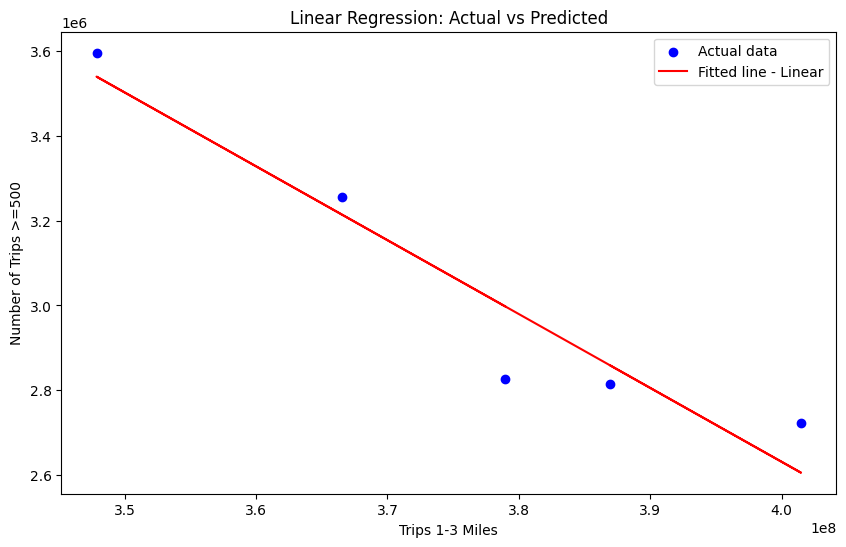

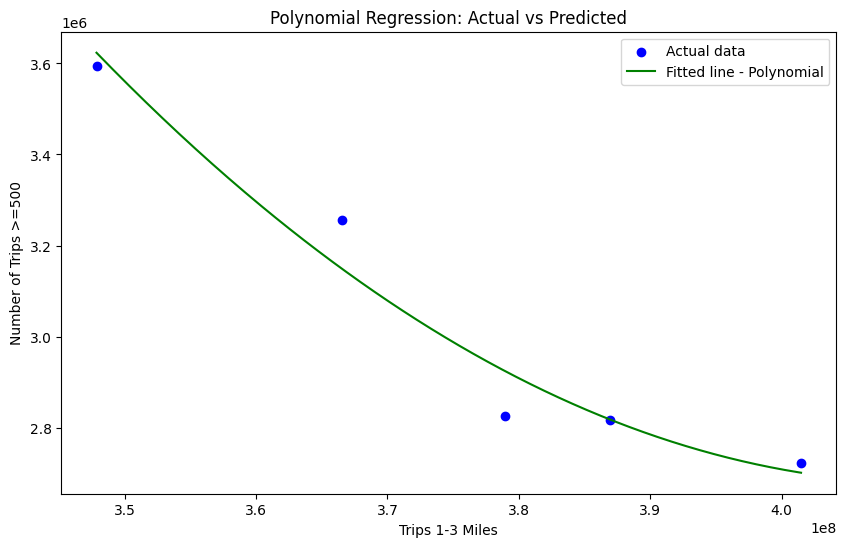

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Function to load and preprocess data
def load_and_preprocess(file_path, date_column, week_column, target_week):
    df = pd.read_csv(file_path)
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df_filtered = df[df[week_column] == target_week]
    return df_filtered

# Function to fit and evaluate models
def fit_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {}

    # Linear Regression
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    models['linear'] = {
        'model': model_lr,
        'predictions': {
            'train': model_lr.predict(X_train),
            'test': model_lr.predict(X_test)
        },
        'score_train': model_lr.score(X_train, y_train),
        'score_test': model_lr.score(X_test, y_test)
    }

    # Polynomial Regression
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    model_poly = LinearRegression()
    model_poly.fit(X_poly_train, y_train)
    models['polynomial'] = {
        'model': model_poly,
        'poly_features': poly_features,
        'predictions': {
            'train': model_poly.predict(X_poly_train),
            'test': model_poly.predict(X_poly_test)
        },
        'score_train': model_poly.score(X_poly_train, y_train),
        'score_test': model_poly.score(X_poly_test, y_test)
    }

    # OLS model
    X_sm_train = sm.add_constant(X_train)
    model_sm = sm.OLS(y_train, X_sm_train).fit()
    X_sm_test = sm.add_constant(X_test)
    models['OLS'] = {
        'model': model_sm,
        'predictions': {
            'train': model_sm.predict(X_sm_train),
            'test': model_sm.predict(X_sm_test)
        },
        'summary': model_sm.summary()
    }

    return models



# Function to plot results
def plot_results(X_train, y_train, model, poly_features, model_name, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Actual data')
    if model_name == 'Polynomial':
        X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
        X_range_poly = poly_features.transform(X_range)
        plt.plot(X_range, model.predict(X_range_poly), color='green', label='Fitted line - Polynomial')
    else:
        plt.plot(X_train, model.predict(X_train), color='red', label='Fitted line - Linear')
    plt.title(title)
    plt.xlabel('Trips 1-3 Miles')
    plt.ylabel('Number of Trips >=500')
    plt.legend()
    plt.show()

# Main script
if __name__ == "__main__":
    df_full = load_and_preprocess("Trips_Full_Data.csv", 'Date', 'Week of Date', 32)
    df = load_and_preprocess("Trips_by_Distance.csv", 'Date', 'Week', 32)

    if not df_full.empty and not df.empty and 'Trips 1-3 Miles' in df_full.columns and 'Number of Trips >=500' in df.columns:
        n = min(len(df_full), len(df))
        X = df_full['Trips 1-3 Miles'].iloc[:n].values.reshape(-1, 1)
        y = df['Number of Trips >=500'].iloc[:n].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        models = fit_and_evaluate_models(X_train, X_test, y_train, y_test)
        
        
        print("Model Summary Table:")
        
        print("\nPredictions from Polynomial Regression (Testing):")
        print(models['polynomial']['predictions']['test'])
        print("\nOLS Regression Results:")
        print(models['OLS']['summary'])

        plot_results(X_train, y_train, models['linear']['model'], None, 'Linear', 'Linear Regression: Actual vs Predicted')
        plot_results(X_train, y_train, models['polynomial']['model'], models['polynomial']['poly_features'], 'Polynomial', 'Polynomial Regression: Actual vs Predicted')
    else:
        print("Check the input data and column names.")


Model Summary Table:
                   Model  R-squared (Training)
0      Linear Regression              0.909419
1  Polynomial Regression              0.959206

Predictions from Polynomial Regression (Testing):
[3662084.40986976 3345328.57800958]

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     30.12
Date:                Fri, 12 Apr 2024   Prob (F-statistic):             0.0119
Time:                        16:12:27   Log-Likelihood:                -64.663
No. Observations:                   5   AIC:                             133.3
Df Residuals:                       3   BIC:                             132.5
Df Model:                           1                                         
Covariance Type

c:\Users\shoai\Desktop\python 3.7\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


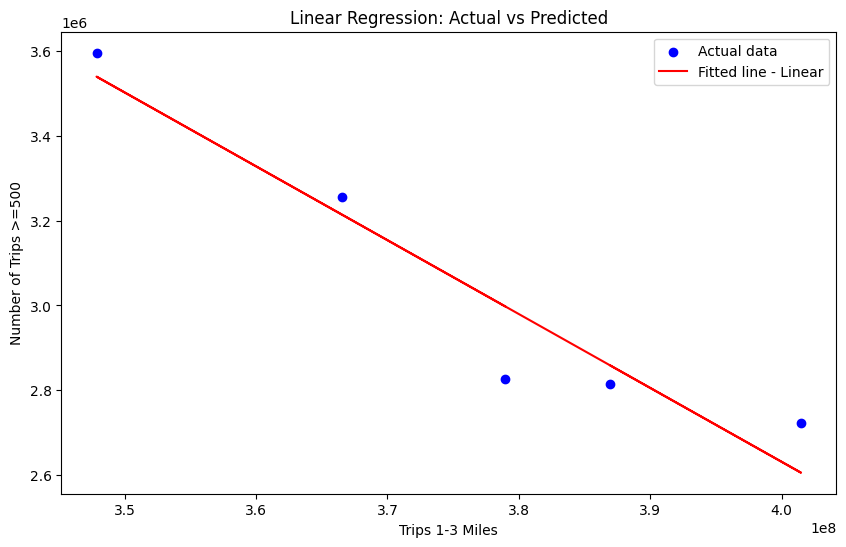

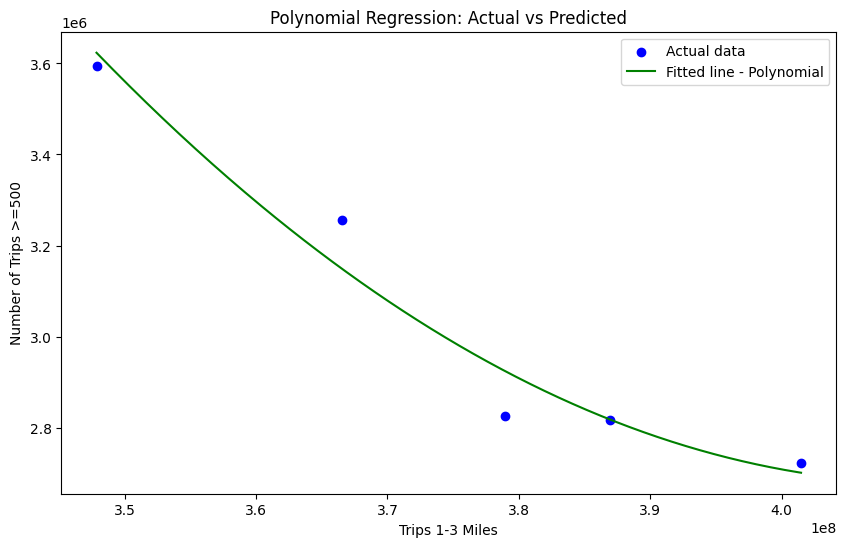

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Function to load and preprocess data
def load_and_preprocess_data(file_path, date_col, week_col, target_week):
    data_frame = pd.read_csv(file_path)
    data_frame[date_col] = pd.to_datetime(data_frame[date_col], errors='coerce')
    filtered_data = data_frame[data_frame[week_col] == target_week]
    return filtered_data

# Function to fit and evaluate models
def fit_and_evaluate_models(features_train, features_test, targets_train, targets_test):
    regression_models = {}

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(features_train, targets_train)
    regression_models['linear'] = {
        'model': linear_model,
        'predictions': {
            'train': linear_model.predict(features_train),
            'test': linear_model.predict(features_test)
        },
        'score_train': linear_model.score(features_train, targets_train),
        'score_test': linear_model.score(features_test, targets_test)
    }

    # Polynomial Regression
    polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)
    features_train_poly = polynomial_transformer.fit_transform(features_train)
    features_test_poly = polynomial_transformer.transform(features_test)
    polynomial_model = LinearRegression()
    polynomial_model.fit(features_train_poly, targets_train)
    regression_models['polynomial'] = {
        'model': polynomial_model,
        'transformer': polynomial_transformer,
        'predictions': {
            'train': polynomial_model.predict(features_train_poly),
            'test': polynomial_model.predict(features_test_poly)
        },
        'score_train': polynomial_model.score(features_train_poly, targets_train),
        'score_test': polynomial_model.score(features_test_poly, targets_test)
    }

    # OLS model
    features_train_ols = sm.add_constant(features_train)
    ols_model = sm.OLS(targets_train, features_train_ols).fit()
    features_test_ols = sm.add_constant(features_test)
    regression_models['OLS'] = {
        'model': ols_model,
        'predictions': {
            'train': ols_model.predict(features_train_ols),
            'test': ols_model.predict(features_test_ols)
        },
        'summary': ols_model.summary()
    }

    return regression_models

# Function to create summary table
def create_summary_table(models):
    summary_data = {
        "Model": ["Linear Regression", "Polynomial Regression"],
        "R-squared (Training)": [models['linear']['score_train'], models['polynomial']['score_train']],
        
    }
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Function to plot results
def plot_regression_results(features_train, targets_train, model, transformer, model_label, plot_title):
    plt.figure(figsize=(10, 6))
    plt.scatter(features_train, targets_train, color='blue', label='Actual data')
    if model_label == 'Polynomial':
        feature_range = np.linspace(features_train.min(), features_train.max(), 300).reshape(-1, 1)
        feature_range_poly = transformer.transform(feature_range)
        plt.plot(feature_range, model.predict(feature_range_poly), color='green', label='Fitted line - Polynomial')
    else:
        plt.plot(features_train, model.predict(features_train), color='red', label='Fitted line - Linear')
    plt.title(plot_title)
    plt.xlabel('Trips 1-3 Miles')
    plt.ylabel('Number of Trips >=500')
    plt.legend()
    plt.show()

# Main script
if __name__ == "__main__":
    full_trip_data = load_and_preprocess_data("Trips_Full_Data.csv", 'Date', 'Week of Date', 32)
    distance_trip_data = load_and_preprocess_data("Trips_by_Distance.csv", 'Date', 'Week', 32)

    if not full_trip_data.empty and not distance_trip_data.empty and 'Trips 1-3 Miles' in full_trip_data.columns and 'Number of Trips >=500' in distance_trip_data.columns:
        min_length = min(len(full_trip_data), len(distance_trip_data))
        trip_features = full_trip_data['Trips 1-3 Miles'].iloc[:min_length].values.reshape(-1, 1)
        trip_targets = distance_trip_data['Number of Trips >=500'].iloc[:min_length].values
        features_train, features_test, targets_train, targets_test = train_test_split(trip_features, trip_targets, test_size=0.2, random_state=42)
        
        models = fit_and_evaluate_models(features_train, features_test, targets_train, targets_test)
        models_summary = create_summary_table(models)
        
        print("Model Summary Table:")
        print(models_summary)
        print("\nPredictions from Polynomial Regression (Testing):")
        print(models['polynomial']['predictions']['test'])
        print("\nOLS Regression Results:")
        print(models['OLS']['summary'])

        plot_regression_results(features_train, targets_train, models['linear']['model'], None, 'Linear', 'Linear Regression: Actual vs Predicted')
        plot_regression_results(features_train, targets_train, models['polynomial']['model'], models['polynomial']['transformer'], 'Polynomial', 'Polynomial Regression: Actual vs Predicted')
    else:
        print("Check the input data and column names.")


Model Summary Table:
                   Model  R-squared (Training)
0      Linear Regression              0.909419
1  Polynomial Regression              0.959206

Predictions from Polynomial Regression (Testing):
[3662084.40986976 3345328.57800958]

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     30.12
Date:                Fri, 12 Apr 2024   Prob (F-statistic):             0.0119
Time:                        16:21:40   Log-Likelihood:                -64.663
No. Observations:                   5   AIC:                             133.3
Df Residuals:                       3   BIC:                             132.5
Df Model:                           1                                         
Covariance Type

c:\Users\shoai\Desktop\python 3.7\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


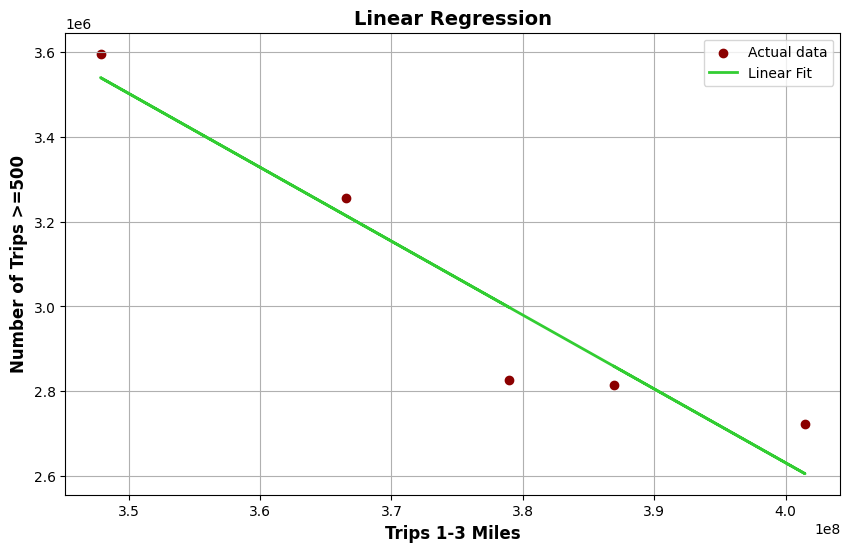

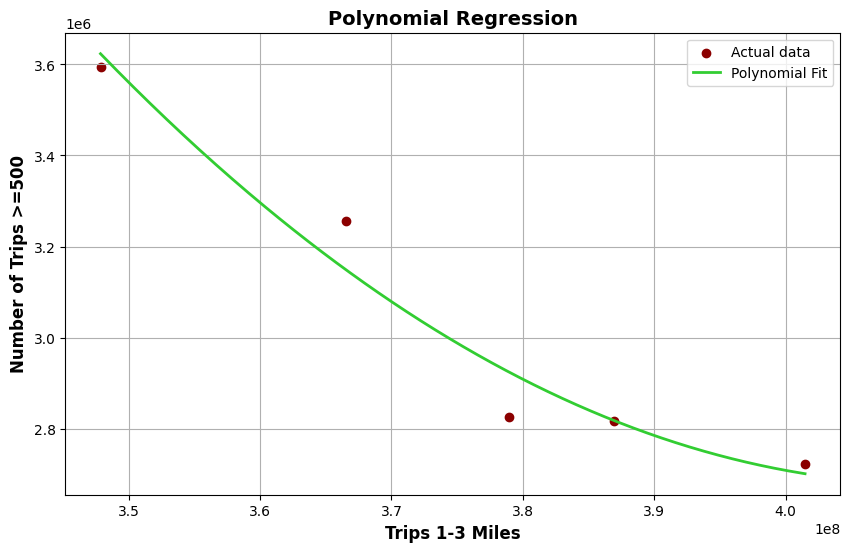

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Function to load and preprocess data
def load_and_preprocess_data(file_path, date_col, week_col, target_week):
    data_frame = pd.read_csv(file_path)
    data_frame[date_col] = pd.to_datetime(data_frame[date_col], errors='coerce')
    filtered_data = data_frame[data_frame[week_col] == target_week]
    return filtered_data

# Function to fit and evaluate models
def fit_and_evaluate_models(features_train, features_test, targets_train, targets_test):
    regression_models = {}

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(features_train, targets_train)
    regression_models['linear'] = {
        'model': linear_model,
        'predictions': {
            'train': linear_model.predict(features_train),
            'test': linear_model.predict(features_test)
        },
        'score_train': linear_model.score(features_train, targets_train),
        'score_test': linear_model.score(features_test, targets_test)
    }

    # Polynomial Regression
    polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)
    features_train_poly = polynomial_transformer.fit_transform(features_train)
    features_test_poly = polynomial_transformer.transform(features_test)
    polynomial_model = LinearRegression()
    polynomial_model.fit(features_train_poly, targets_train)
    regression_models['polynomial'] = {
        'model': polynomial_model,
        'transformer': polynomial_transformer,
        'predictions': {
            'train': polynomial_model.predict(features_train_poly),
            'test': polynomial_model.predict(features_test_poly)
        },
        'score_train': polynomial_model.score(features_train_poly, targets_train),
        'score_test': polynomial_model.score(features_test_poly, targets_test)
    }

    # OLS model
    features_train_ols = sm.add_constant(features_train)
    ols_model = sm.OLS(targets_train, features_train_ols).fit()
    features_test_ols = sm.add_constant(features_test)
    regression_models['OLS'] = {
        'model': ols_model,
        'predictions': {
            'train': ols_model.predict(features_train_ols),
            'test': ols_model.predict(features_test_ols)
        },
        'summary': ols_model.summary()
    }

    return regression_models

# Function to create summary table
def create_summary_table(models):
    summary_data = {
        "Model": ["Linear Regression", "Polynomial Regression"],
        "R-squared (Training)": [models['linear']['score_train'], models['polynomial']['score_train']]
        
    }
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Function to plot results
def plot_regression_results(features_train, targets_train, model, transformer, model_label, plot_title):
    plt.figure(figsize=(10, 6))
    plt.scatter(features_train, targets_train, color='darkred', label='Actual data')
    plt.xlabel('Trips 1-3 Miles', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Trips >=500', fontsize=12, fontweight='bold')
    plt.title(plot_title, fontsize=14, fontweight='bold')

    if model_label == 'Polynomial':
        feature_range = np.linspace(features_train.min(), features_train.max(), 300).reshape(-1, 1)
        feature_range_poly = transformer.transform(feature_range)
        plt.plot(feature_range, model.predict(feature_range_poly), color='limegreen', linewidth=2, label='Polynomial Fit')
    else:
        plt.plot(features_train, model.predict(features_train), color='limegreen', linewidth=2, label='Linear Fit')
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Main script
if __name__ == "__main__":
    full_trip_data = load_and_preprocess_data("Trips_Full_Data.csv", 'Date', 'Week of Date', 32)
    distance_trip_data = load_and_preprocess_data("Trips_by_Distance.csv", 'Date', 'Week', 32)

    if not full_trip_data.empty and not distance_trip_data.empty and 'Trips 1-3 Miles' in full_trip_data.columns and 'Number of Trips >=500' in distance_trip_data.columns:
        min_length = min(len(full_trip_data), len(distance_trip_data))
        trip_features = full_trip_data['Trips 1-3 Miles'].iloc[:min_length].values.reshape(-1, 1)
        trip_targets = distance_trip_data['Number of Trips >=500'].iloc[:min_length].values
        features_train, features_test, targets_train, targets_test = train_test_split(trip_features, trip_targets, test_size=0.2, random_state=42)
        
        models = fit_and_evaluate_models(features_train, features_test, targets_train, targets_test)
        models_summary = create_summary_table(models)
        
        print("Model Summary Table:")
        print(models_summary)
        
        print("\nPredictions from Polynomial Regression (Testing):")
        print(models['polynomial']['predictions']['test'])
        
        print("\nOLS Regression Results:")
        print(models['OLS']['summary'])

        plot_regression_results(features_train, targets_train, models['linear']['model'], None, 'Linear', 'Linear Regression')
        plot_regression_results(features_train, targets_train, models['polynomial']['model'], models['polynomial']['transformer'], 'Polynomial', 'Polynomial Regression')
    else:
        print("Check the input data and column names.")
